# Машинное обучение, ФКН ВШЭ

## Практическое задание 4. Классификация. 

### Общая информация
Дата выдачи: **#TODO**

Мягкий дедлайн: **#TODO** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **#TODO**

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровочными кривыми
- изучите методы трансформации переменных и методы отбора признаков
- попробуете принести прибыль вашему бизнесу с помощью профессиональных навыков 
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 1e9+7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`).

In [3]:
#ваш код здесь

from sklearn.svm import SVC
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score, average_precision_score

linear_svm_classifier = SVC(kernel='linear', verbose=True)
linear_svm_classifier.fit(X_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

На тестовой части посчитайте ROC-AUC, PR-AUC с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами - в чем их различия? Сравните результаты. 

In [4]:
#1
prob = linear_svm_classifier.decision_function(X_test)
roc_auc = roc_auc_score(y_test, prob)
pr_auc = average_precision_score(y_test, prob)
print('Closed-form values, SVM:')
print(f'ROC-AUC: {roc_auc:.5f}')
print(f'PR-AUC: {pr_auc:.5f}')

Closed-form values, SVM:
ROC-AUC: 0.84790
PR-AUC: 0.81530


In [5]:
#2
FPR, TPR, t1 = roc_curve(y_test, prob)
roc_auc_int = auc(FPR, TPR)
pr, rec, t2 = precision_recall_curve(y_test, prob)
pr_auc_int = auc(rec, pr)
print("Numerical integration, SVM:")
print(f"ROC-AUC: {roc_auc_int:.5f}")
print(f"PR-AUC: {pr_auc_int:.5f}")

Numerical integration, SVM:
ROC-AUC: 0.84790
PR-AUC: 0.81489


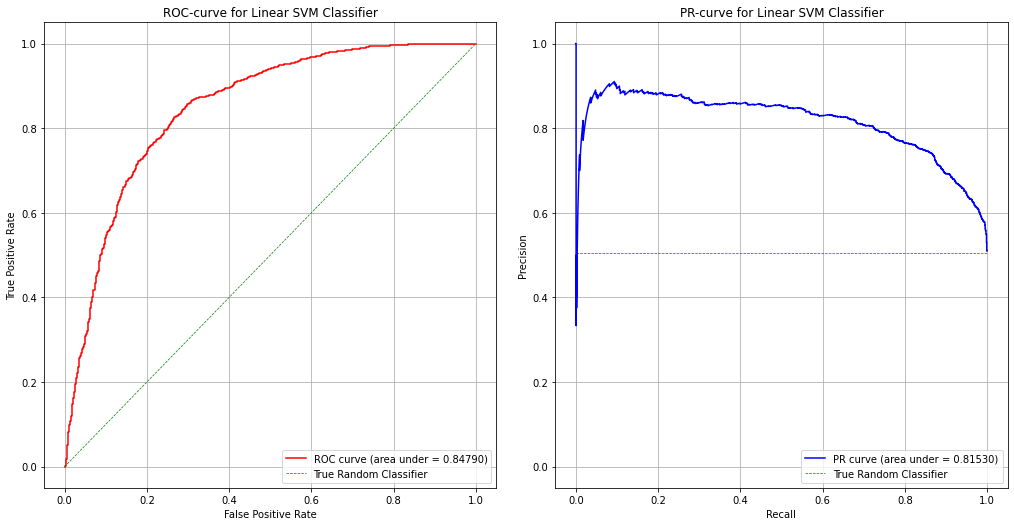

In [6]:
plt.figure(figsize=(14, 7))

#ROC
ax1 = plt.subplot(121)
plt.plot(FPR, TPR, color='r', label=f'ROC curve (area under = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='green', lw=0.7, linestyle='--', label='True Random Classifier')
plt.grid()
plt.tight_layout()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for Linear SVM Classifier')
plt.legend(loc="lower right")

#PR
plt.subplot(122, sharey = ax1)
plt.plot(rec, pr, color='b', label=f'PR curve (area under = {pr_auc:.5f})')
plt.hlines(y_test.mean(), color='green', lw=0.7, linestyle='--', label='True Random Classifier', xmin=0, xmax=1)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve for Linear SVM Classifier')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.13);

А теперь проделайте все то же самое для логистической регрессии. Сравните результаты.

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
#1
prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, prob)
pr_auc = average_precision_score(y_test, prob)
print('Closed-form values, LR:')
print(f'ROC-AUC: {roc_auc:.5f}')
print(f'PR-AUC: {pr_auc:.5f}')

Closed-form values, LR:
ROC-AUC: 0.84787
PR-AUC: 0.82938


In [9]:
FPR, TPR, t1 = roc_curve(y_test, prob)
roc_auc_int = auc(FPR, TPR)
pr, rec, t2 = precision_recall_curve(y_test, prob)
pr_auc_int = auc(rec, pr)
print("Numerical integration, LR:")
print(f"ROC-AUC: {roc_auc_int:.5f}")
print(f"PR-AUC: {pr_auc_int:.5f}")

Numerical integration, LR:
ROC-AUC: 0.84787
PR-AUC: 0.82912


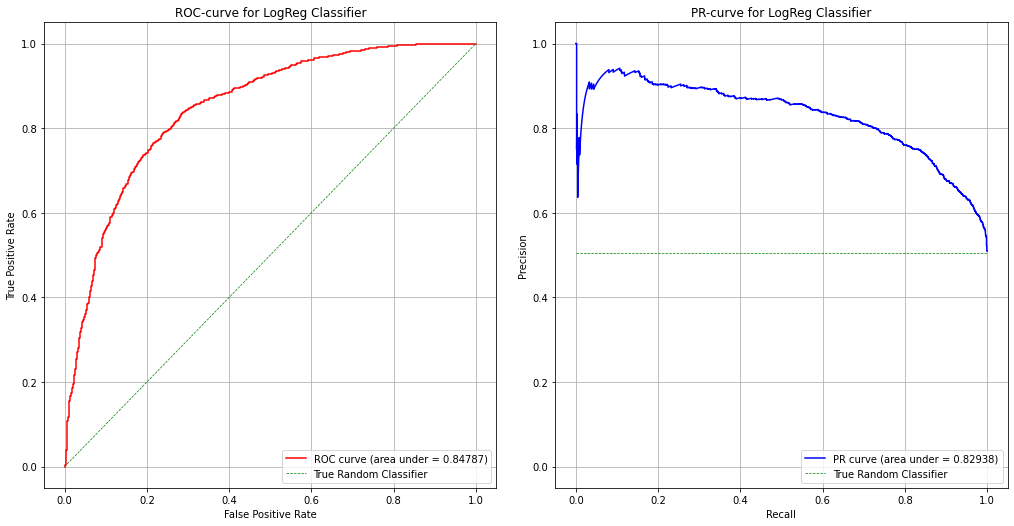

In [10]:
plt.figure(figsize=(14, 7))

#ROC
ax1 = plt.subplot(121)
plt.plot(FPR, TPR, color='r', label=f'ROC curve (area under = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='green', lw=0.7, linestyle='--', label='True Random Classifier')
plt.grid()
plt.tight_layout()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve for LogReg Classifier')
plt.legend(loc="lower right")

#PR
plt.subplot(122, sharey = ax1)
plt.plot(rec, pr, color='b', label=f'PR curve (area under = {pr_auc:.5f})')
plt.hlines(y_test.mean(), color='green', lw=0.7, linestyle='--', label='True Random Classifier', xmin=0, xmax=1)
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-curve for LogReg Classifier')
plt.legend(loc="lower right")

plt.subplots_adjust(wspace=0.13);

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

In [11]:
X, y = make_classification(
    n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2,
    class_sep=2.5, 
    random_state=1337)

In [12]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y);

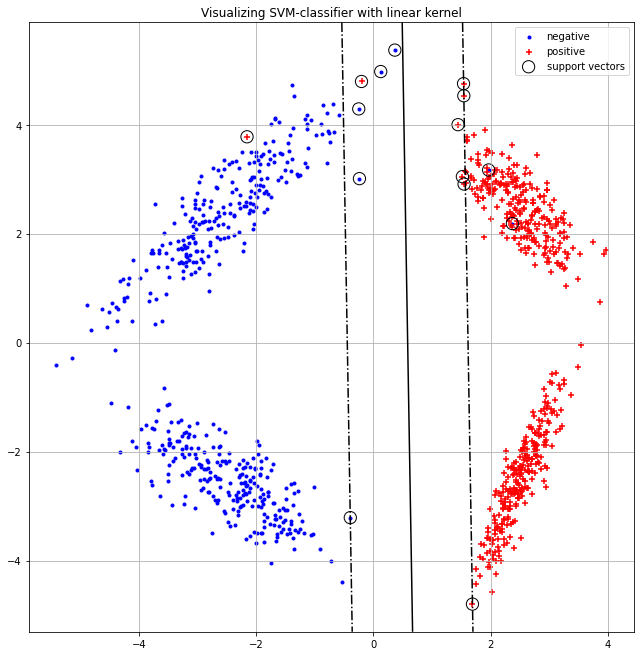

In [13]:
plt.figure(figsize=(9,9))


X_neg, X_pos = X[y == 0], X[y == 1]
plt.scatter(X_neg[:,0], X_neg[:,1], label='negative', marker='.', c='b')
plt.scatter(X_pos[:,0], X_pos[:,1], label='positive', marker='+', c='r')

xlim = plt.xlim()
ylim = plt.ylim()
pltx = np.linspace(xlim[0], xlim[1])
plty = np.linspace(ylim[0], ylim[1])
xgrid, ygrid = np.meshgrid(pltx, plty)
pltxy = np.vstack([xgrid.ravel(), ygrid.ravel()]).T
P = svm_classifier.decision_function(pltxy).reshape(xgrid.shape)
plt.contour(xgrid, ygrid, P, colors='black', levels=[-1, 0, 1], linestyles=['-.', '-', '-.'])

plt.scatter(svm_classifier.support_vectors_[:, 0],
                   svm_classifier.support_vectors_[:, 1],
                   s=150, linewidth=1, facecolors='none', edgecolors='black', label='support vectors');
plt.grid()
plt.tight_layout()
plt.title("Visualizing SVM-classifier with linear kernel")
plt.legend();

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов апостериорное распределение положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

In [14]:
logreg = LogisticRegression()
logreg.fit(X, y);

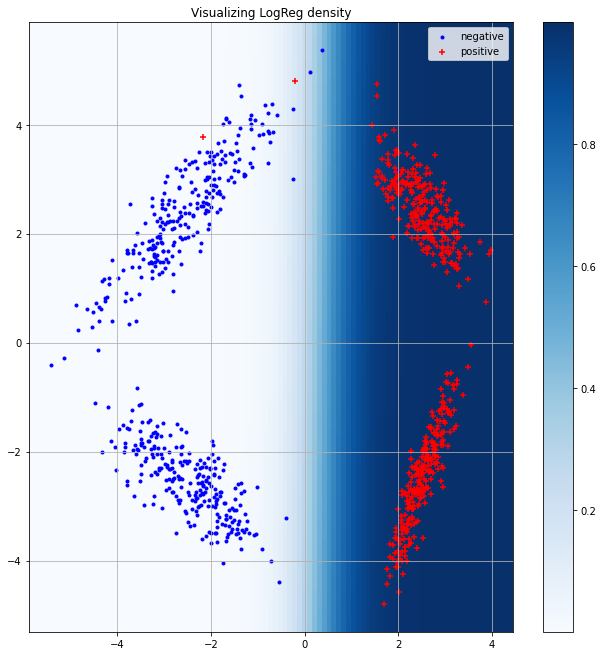

In [15]:
plt.figure(figsize=(9,9))

plt.scatter(X_neg[:,0], X_neg[:,1], marker='.', c='b')
plt.scatter(X_pos[:,0], X_pos[:,1], marker='+', c='r')
xlim = plt.xlim()
ylim = plt.ylim()

xgrid = np.linspace(xlim[0], xlim[1], 100)
ygrid = np.linspace(ylim[0], ylim[1], 100)


xcoords, ycoords = np.meshgrid(xgrid, ygrid)
preds = logreg.predict_proba(np.vstack([xcoords.ravel(), ycoords.ravel()]).T)[:,1].reshape(100, 100)
mesh = plt.pcolor(xgrid, ygrid, preds, cmap='Blues')
plt.scatter(X_neg[:,0], X_neg[:,1], label='negative', marker='.', c='b')
plt.scatter(X_pos[:,0], X_pos[:,1], label='positive', marker='+', c='r')
plt.colorbar(mesh)
plt.grid()
plt.tight_layout()
plt.title('Visualizing LogReg density')
plt.legend();

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [16]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2) #было l - r
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1)) #было np.min
    plt.figure(figsize=(6,6))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.ylim([-0.05, 1.05])
    plt.grid()

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

In [17]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

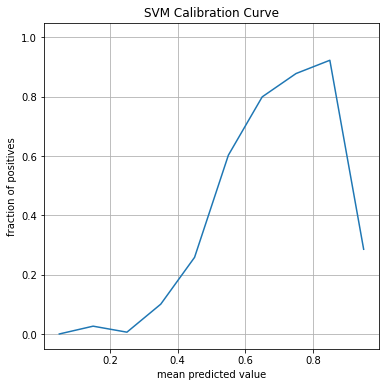

In [18]:
linear_svm_classifier = SVC(kernel='linear')
linear_svm_classifier.fit(X_train, y_train)
svm_pred = linear_svm_classifier.decision_function(X_test)
svm_calib = (svm_pred - svm_pred.min()) / (svm_pred.max() - svm_pred.min())

plot_calibration_curve(y_test, svm_calib)
plt.title('SVM Calibration Curve')
plt.xlabel('mean predicted value')
plt.ylabel('fraction of positives')
plt.show()

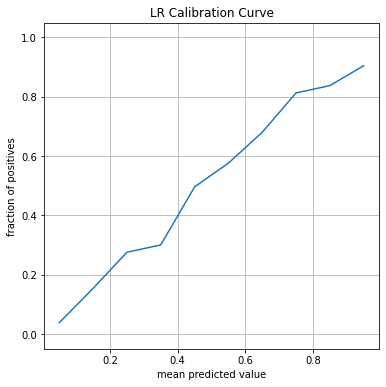

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, logreg_pred)
plt.title('LR Calibration Curve')
plt.xlabel('mean predicted value')
plt.ylabel('fraction of positives')
plt.show()

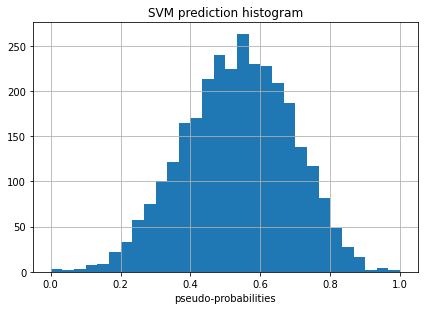

In [20]:
plt.hist(svm_calib, bins=30)
plt.grid()
plt.tight_layout()
plt.title("SVM prediction histogram")
plt.xlabel("pseudo-probabilities")
plt.show()

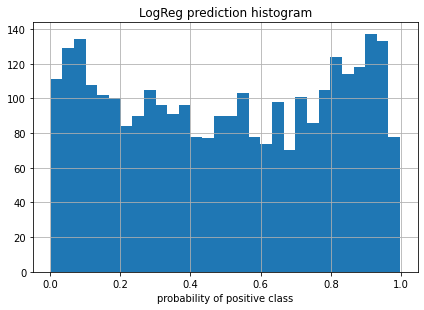

In [21]:
plt.hist(logreg_pred, bins=30)
plt.grid()
plt.tight_layout()
plt.title("LogReg prediction histogram")
plt.xlabel("probability of positive class")
plt.show()

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

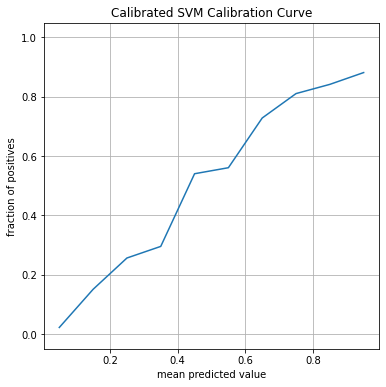

In [22]:
from sklearn.calibration import CalibratedClassifierCV

calib = CalibratedClassifierCV(base_estimator=linear_svm_classifier, cv='prefit')
calib.fit(X_train, y_train)
calib_pred = calib.predict_proba(X_test)[:,1]
plot_calibration_curve(y_test, calib_pred)
plt.title('Calibrated SVM Calibration Curve')
plt.xlabel('mean predicted value')
plt.ylabel('fraction of positives')
plt.show()

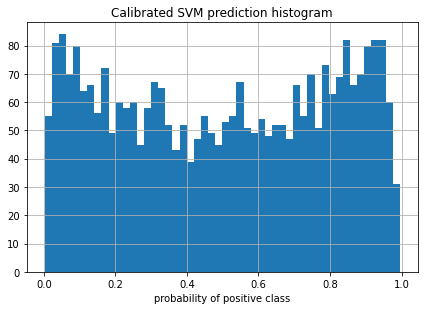

In [23]:
plt.hist(calib_pred, bins=50)
plt.grid()
plt.tight_layout()
plt.title("Calibrated SVM prediction histogram")
plt.xlabel("probability of positive class")
plt.show()

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

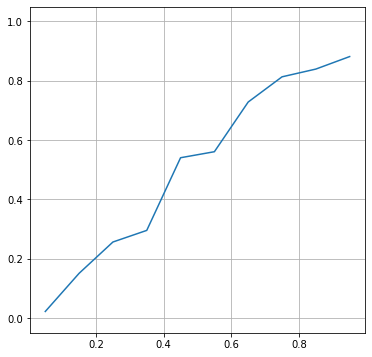

In [24]:
# здесь надо бы добавить еще валидационный сет но мне лень
linear_svm_classifier = SVC(kernel='linear')
linear_svm_classifier.fit(X_train, y_train)
svm_pred = linear_svm_classifier.decision_function(X_test)
svm_pred_train = linear_svm_classifier.decision_function(X_train)


logreg = LogisticRegression()                                                       
logreg.fit(svm_pred_train.reshape(-1, 1), y_train)
calib = logreg.predict_proba(svm_pred.reshape(-1, 1))[:,1]

plot_calibration_curve(y_test, calib)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


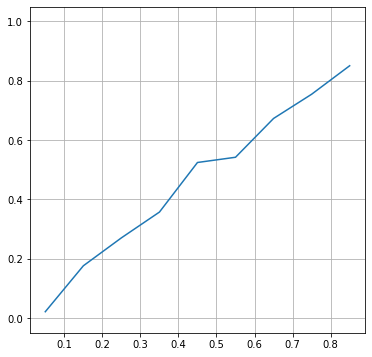

In [25]:
from sklearn.isotonic import IsotonicRegression

isoreg = IsotonicRegression()
isoreg.fit(svm_pred_train, y_train)
calib = isoreg.transform(svm_pred)

plot_calibration_curve(y_test, calib)

# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [53]:
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
#!unzip bank-additional.zip
df = pd.read_csv('bank-additional-full.csv', sep=';')
#df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [54]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Задание 3.__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи, какой? Отбросьте его. 

__(0.5 балла)__ 

In [63]:
X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=777, stratify=y)

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `PR-AUC`) при применении логистической регрессии. 

__Вопрос__: почему в данном задании мы выбрали метрикой именно `PR-AUC`, а не, к примеру, `ROC-AUC`?

__Ваш ответ__: баланс классов

In [64]:
num = X_train.columns[(X_train.dtypes == 'int') | (X_train.dtypes == 'float')]
cat = X_train.columns[~((X_train.dtypes == 'int') | (X_train.dtypes == 'float'))]

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('scale', StandardScaler(), num),
    ('enc', OrdinalEncoder(), cat)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('logreg', LogisticRegression(max_iter=1000))
])


In [66]:
pipeline.fit(X_train, y_train)
average_precision_score(y_val, pipeline.predict_proba(X_val)[:,1])

0.44222274604357137

__Задание 4.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [67]:
column_transformer = ColumnTransformer([
    ('scale', StandardScaler(), num),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('logreg', LogisticRegression(max_iter=1000))
])


In [68]:
pipeline.fit(X_train, y_train)
average_precision_score(y_val, pipeline.predict_proba(X_val)[:,1])

0.4496624098984099

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5.__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущим экспериментов. Заметили ли вы что-то интересное?

__(1 балл)__

__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, cats=None):
        self.cats = cats
        
    def fit(self, X, y):
        if self.cats is None:
            return X
        else:
            self.maps = []
            for c in self.cats:
                vals = X[c].drop_duplicates().values
                d = {val : y[X[c] == val].mean() for val in vals}
                self.maps.append(d)
        return self
    
    def transform(self, X):
        newX = X.copy()
        for c, d in zip(self.cats, self.maps):
            newX.loc[:, c] = newX.loc[:, c].map(d)
        return newX.fillna(0)
    
    def fit_transform(self, X, y):
        return self.fit(X, y).transform(X)

In [70]:
column_transformer = ColumnTransformer([
    ('scale', StandardScaler(), X_train.columns)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('mte', MeanTargetTransformer(cat)),
    ('transform', column_transformer),
    ('logreg', LogisticRegression())
])

pipeline.fit(X_train, y_train)
average_precision_score(y_val, pipeline.predict_proba(X_val)[:,1])

0.4428276257694549

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.5 балла)__

In [71]:
#your code here

__(Бонусная часть)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 

__(+0.5 балла)__

In [72]:
#your code here

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7.__ Добавьте сглаживание, описанное выше и повторите эксперименты.

__(1 балл)__

In [87]:
#your code here

__Задание 8.__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?

__(0.5 балла)__

In [73]:
column_transformer = ColumnTransformer([
    ('scale', StandardScaler(), X_train.columns)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('mte', MeanTargetTransformer(list(cat) + ['age'])),
    ('transform', column_transformer),
    ('logreg', LogisticRegression())
])

pipeline.fit(X_train, y_train)
average_precision_score(y_val, pipeline.predict_proba(X_val)[:,1])

0.43880320605073997

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

In [76]:
#your code here

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

__Ответ:__ а

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [82]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [83]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), cat)
], remainder='passthrough')
features_num = column_transformer.fit_transform(X_train).shape[1]
print("{} features after One-Hot Encoding".format(features_num))

62 features after One-Hot Encoding


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `PR-AUC`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [84]:
column_transformer = ColumnTransformer([
    ('scale', StandardScaler(), num),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('transform', column_transformer),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
average_precision_score(y_val, pipeline.predict_proba(X_val)[:,1])

0.4496624098984099

### Встроенные методы. 

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 9.__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?

__(0.5 балла)__

In [85]:
#your code here

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [86]:
#your code here

Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

In [88]:
#your code here

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $mu$, $sigma$, $n$ соответственно среднее, среднеквадратичное отклонение и количество объектов каждого из классов.

__Задание 10.__ Оставьте 40 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случаев.

__(0.5 балла)__

In [89]:
#your code here

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [90]:
#your code here

Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук. Найдется ли порог, при котором добавление следующих признаков будет только ухудшать качество модели?

In [91]:
#your code here

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** Махмуд...

# Часть 3. Оценка экономического импакта модели. 

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько кастомных метрик, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11.__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Загрузите данные. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. Попробуйте для каждого фолда обучить логистическую регрессию (воспользуйтесь one-hot для категориальных признаков) и сделать предсказания для отложенной выборки. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех отложенных выборках выручку и усредните. Сколько денег удалось заработать? Также вычислите стандартное отклонение.

__(1 балл)__

In [92]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

In [104]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=500)

revs = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    column_transformer = ColumnTransformer([
        ('scale', StandardScaler(), num),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
    ], remainder='passthrough')

    pipeline = Pipeline(steps=[
        ('transform', column_transformer),
        ('logreg', LogisticRegression(max_iter=1000))
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    calls = preds[preds]
    ans = y_test[preds]
    revenue = 10*ans.sum() - len(ans)
    revs.append(revenue)
    
    
print(f'Estimated revenue:{np.mean(revs):.4f} ± {np.std(revs):.4f}')


Estimated revenue:1805.6000 ± 108.7614


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [105]:
kf = KFold(n_splits=5, shuffle=True, random_state=500)

revs = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    column_transformer = ColumnTransformer([
        ('scale', StandardScaler(), num),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
    ], remainder='passthrough')

    pipeline = Pipeline(steps=[
        ('transform', column_transformer),
        ('logreg', LogisticRegression(max_iter=1000))
    ])
    
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    calls = preds[preds]
    ans = y_test[preds]
    
    profit_vec = np.random.uniform(0, 20, ans.sum())
    profit = (profit_vec*ans[ans]).sum()
    
    revenue = profit - len(ans)
    revs.append(revenue)
    
    
print(f'Estimated randomized revenue:{np.mean(revs):.4f} ± {np.std(revs):.4f}')


Estimated randomized revenue:1777.0043 ± 65.1574


Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [113]:
means = []
stds = []

for C in np.logspace(-2, 1, 10):
    print(f'testing C={C:.4f}')
    
    kf = KFold(n_splits=5, shuffle=True, random_state=500)

    revs = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        column_transformer = ColumnTransformer([
            ('scale', StandardScaler(), num),
            ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
        ], remainder='passthrough')

        pipeline = Pipeline(steps=[
            ('transform', column_transformer),
            ('logreg', LogisticRegression(C=C, max_iter=1000))
        ])

        pipeline.fit(X_train, y_train)
        preds = pipeline.predict(X_test)
        calls = preds[preds]
        ans = y_test[preds]

        profit_vec = np.random.uniform(0, 20, ans.sum())
        profit = (profit_vec*ans[ans]).sum()

        revenue = profit - len(ans)
        revs.append(revenue)


    print(f'Estimated randomized revenue:{np.mean(revs):.4f} ± {np.std(revs):.4f}')
    
    means.append(np.mean(revs))
    stds.append(np.std(revs))

testing C=0.0100
Estimated randomized revenue:1715.7677 ± 79.6922
testing C=0.0215
Estimated randomized revenue:1748.8495 ± 102.2282
testing C=0.0464
Estimated randomized revenue:1752.7004 ± 145.7999
testing C=0.1000
Estimated randomized revenue:1740.4039 ± 114.0044
testing C=0.2154
Estimated randomized revenue:1772.3927 ± 67.5028
testing C=0.4642
Estimated randomized revenue:1777.4138 ± 110.4875
testing C=1.0000
Estimated randomized revenue:1771.2201 ± 151.6579
testing C=2.1544
Estimated randomized revenue:1814.1117 ± 101.9080
testing C=4.6416
Estimated randomized revenue:1784.3461 ± 73.6356
testing C=10.0000
Estimated randomized revenue:1842.5503 ± 153.8410


Text(0, 0.5, 'profit')

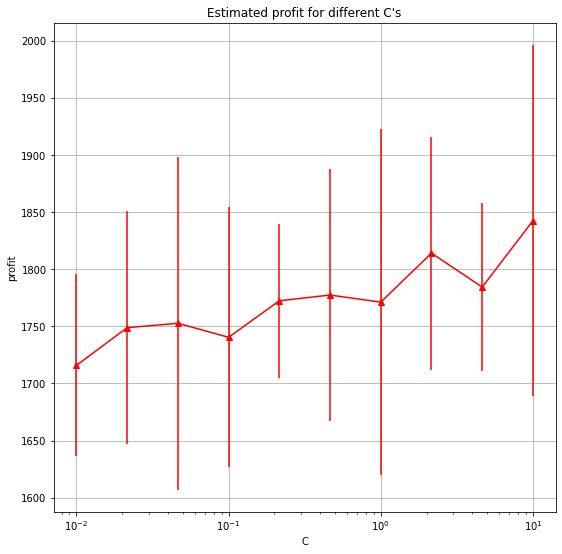

In [122]:
plt.figure(figsize=(9,9))
plt.errorbar(np.logspace(-2, 1, 10), means, stds, marker='^', c='r', barsabove=True)

plt.xscale('log')
plt.grid()
plt.title('Estimated profit for different C\'s')
plt.xlabel('C')
plt.ylabel('profit')

Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Какие вы можете сделать из этого выводы?

In [ ]:
#your code here

__Задание 12.__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее - хороший precision или recall модели?

__Ответ:__

__(1 балл)__

Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [140]:
kf = KFold(n_splits=5, shuffle=True, random_state=500)

revs = []

for train_index, test_index in kf.split(X):
    print('New iter')
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    column_transformer = ColumnTransformer([
        ('scale', StandardScaler(), num),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
    ], remainder='passthrough')

    pipeline = Pipeline(steps=[
        ('transform', column_transformer),
        ('logreg', LogisticRegression(max_iter=1000))
    ])
    
    pipeline.fit(X_train, y_train)
    preds_raw = pipeline.predict_proba(X_test)[:,1]
    
    revs_for_t = []
    
    for threshold in np.arange(0.0, 1.0, 0.01):
        
        
    
        preds = preds_raw >= threshold
        calls = preds[preds]
        ans = y_test[preds]
    
        profit_vec = np.random.uniform(0, 20, ans.sum())
        profit = (profit_vec*ans[ans]).sum()
    
        revenue = profit - len(ans)
        revs_for_t.append(revenue)
        
    revs.append(revs_for_t)
    
    


New iter
New iter
New iter
New iter
New iter


In [141]:
revs = np.array(revs)
revs.shape

(5, 100)

Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

Threshold: 0.13


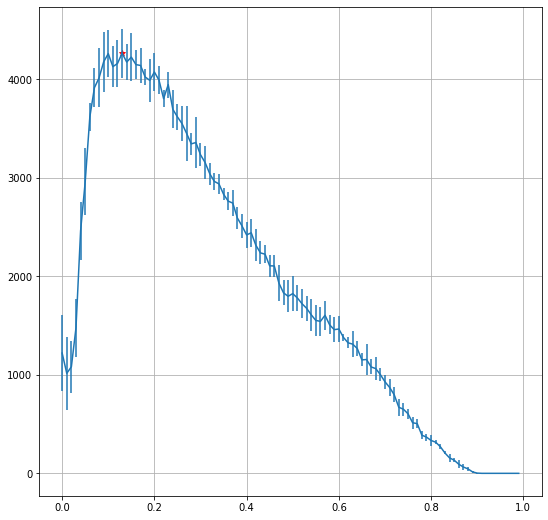

In [142]:
plt.figure(figsize=(9,9))
plt.errorbar(np.arange(0.0, 1.0, 0.01), revs.mean(axis=0), revs.std(axis=0))
best = revs.mean(axis=0).argmax()
plt.scatter(np.arange(0.0, 1.0, 0.01)[best], revs.mean(axis=0).max(), marker='*', c='r')
plt.grid()
print(f'Threshold: {np.arange(0.0, 1.0, 0.01)[best]}')

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации.

In [150]:
from sklearn.metrics import precision_score, recall_score

kf = KFold(n_splits=5, shuffle=True, random_state=500)

pres = []
recs = []

for train_index, test_index in kf.split(X):
    print('New iter')
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    column_transformer = ColumnTransformer([
        ('scale', StandardScaler(), num),
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat)
    ], remainder='passthrough')

    pipeline = Pipeline(steps=[
        ('transform', column_transformer),
        ('logreg', LogisticRegression(max_iter=1000))
    ])
    
    pipeline.fit(X_train, y_train)
    preds_raw = pipeline.predict_proba(X_test)[:,1]
            
    preds = preds_raw >= 0.1
    
    pres.append(precision_score(y_test, preds))
    recs.append(recall_score(y_test, preds))


New iter
New iter
New iter
New iter
New iter


In [151]:
print(np.mean(pres), np.std(pres))
print(np.mean(recs), np.std(recs))

0.3165819364310911 0.012435042179889461
0.6594660349027857 0.02108483212255546


Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [ ]:
#your code here